In [1]:
# Code used to create Figure 4.4b in Ch. 4 of Hourly load profile of Secondary schools (lineplot mean & stdev) 
# Created 7Jul23 - for thesis VF submission
# Based on Jupyter notebook: secschools_load_profile_utavg

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # maybe don't need this

cwd = os.getcwd()
cwd

os.chdir("/Users/po416/Library/CloudStorage/OneDrive-ImperialCollegeLondon/PhDOct2018/Projects (12Mar20)/Project Jua/Sites udata/Filled_files")
os.getcwd()

'/Users/po416/Library/CloudStorage/OneDrive-ImperialCollegeLondon/PhDOct2018/Projects (12Mar20)/Project Jua/Sites udata/Filled_files'

In [2]:
# Plot all means of Secondary schools 
average_data = {}

filenames = {entry for entry in os.listdir(".") if entry.endswith(".csv") \
if ("Secondary" in entry) or ("secondary" in entry)}
# above lines is what changes between institution type in code 
for filename in filenames:
    data = pd.read_csv(filename, usecols = ["Timestamp","Consumption"])
    data["Timestamp"] = pd.to_datetime(data["Timestamp"],format="%d/%m/%Y %H:%M")
    data["Consumption"] *= 1000 # to convert to Wh
    # data['Consumption'].sum() # check totals if needed
    # Calculate average hourly utilisation
    hrly = data.groupby([data["Timestamp"].dt.hour]).Consumption.mean()
    average_data[filename.split("_gaps_filled")[0].replace("_", " ")] = hrly

# Creates df of Hour as index and sites as column, after calculating avg utilisation
results_frame = pd.DataFrame(average_data)
results_frame.round(2)

,Lokitaung Girls Secondary School,Kawala Girls Secondary School,Tiwi Boys Secondary school,Biliqo Day Secondary school,Namortung a Boys Secondary School,Salim Mvurya Secondary School,Mtsamviani Secondary School,Kakalel Boys Secondary School,Kiteje Mixed Secondary School,Amason Jeffah King Secondary School,Elsa Secondary School
Timestamp,,,,,,,,,,,
0,117.63,29.99,22.40,194.79,66.77,41.08,172.48,23.64,211.54,115.44,46.33
1,118.31,29.47,21.78,193.66,64.56,40.00,171.65,20.06,211.88,106.11,41.63
2,110.12,29.21,21.11,192.84,65.51,39.40,170.58,19.54,209.76,101.72,35.69
3,106.55,30.14,19.78,192.69,61.56,39.27,170.12,20.03,207.44,99.32,32.51
4,104.61,33.84,20.03,163.38,97.64,38.60,170.09,32.85,205.47,123.83,31.79
5,107.60,46.50,20.36,97.94,144.04,39.18,162.82,67.12,183.76,215.37,26.85
6,90.62,46.72,18.25,89.60,132.88,41.14,93.21,96.16,78.94,131.73,25.38
7,50.21,49.83,19.68,56.52,66.37,55.96,63.42,75.96,91.32,55.48,24.37
8,33.46,66.74,22.10,50.94,68.68,73.38,74.73,62.12,123.53,41.35,23.17


In [3]:
# Calculate mean of sites
all_sites = results_frame.mean(axis=1)
# Convert to df
all_sites = pd.DataFrame(all_sites)
# Rename column name of df
all_sites.rename(columns = {0:"Mean"}, inplace = True)

# Calculate std of sites
all_sites["Std_dev"] = results_frame.std(axis=1) 
all_sites.round(2)  # to know peak utilisation of all sites together

,Mean,Std_dev
Timestamp,,
0,94.74,71.51
1,92.65,72.07
2,90.50,71.74
3,89.04,71.56
4,92.92,66.18
5,101.05,67.53
6,76.78,39.26
7,55.37,20.48
8,58.20,29.07


In [4]:
# Set style in Seaborn to plot
sns.set(rc={"figure.dpi":300})
sns.set_context("paper")  # change to notebook maybe? That is how it was in Chapter 4 first draft version 
sns.set_style("ticks")

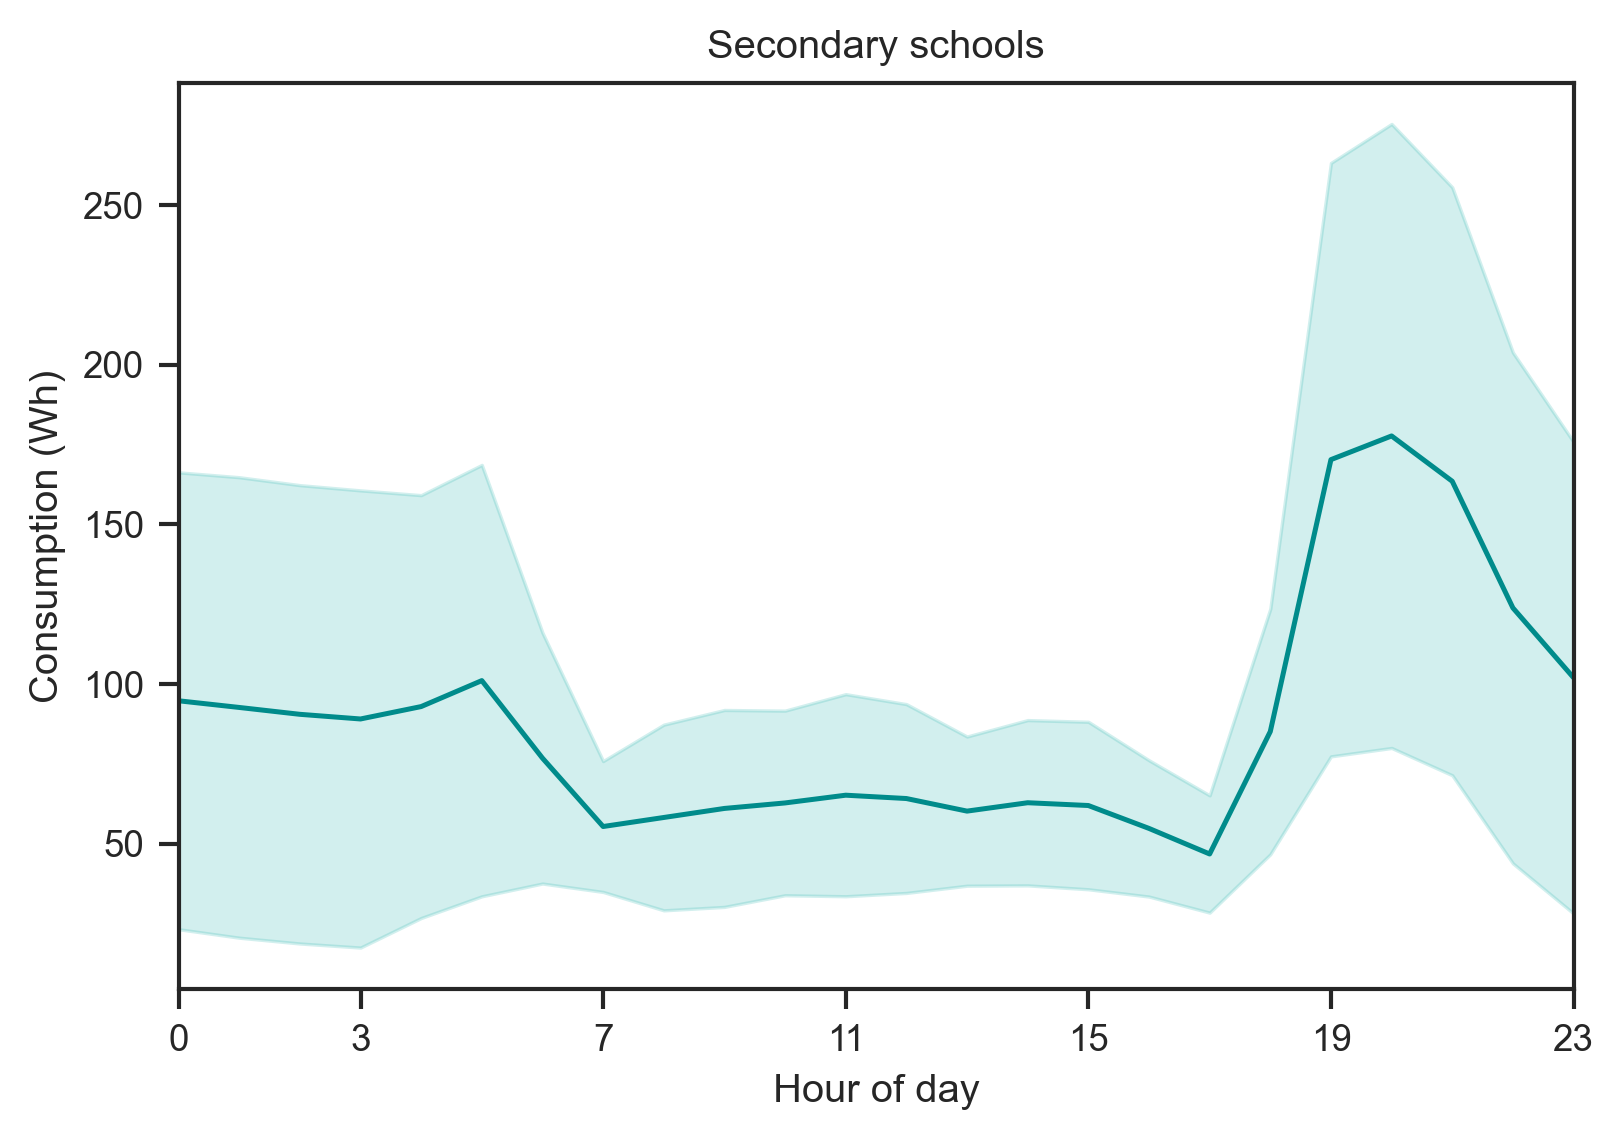

In [5]:
# Reset index to be able to plot it
all_sites = all_sites.reset_index()

# Plot average and std dev hourly utilisation, with shaded area (after resetting index)
ax = plt.gca()
all_sites.plot(kind="line",x="Timestamp",y="Mean", color="darkcyan", ax=ax)
plt.fill_between(all_sites["Timestamp"], all_sites["Mean"] - all_sites["Std_dev"], all_sites["Mean"] + all_sites["Std_dev"], color="lightseagreen",
                 alpha=0.2) # alpha is to make shaded area lighter, save fig in PNG, PDF or SVG
ax.get_legend().remove()
plt.xlabel("Hour of day")
plt.ylabel("Consumption (Wh)")
plt.xticks([0,3,7,11,15,19,23])
plt.xlim(0,23)
plt.title("Secondary schools")
plt.savefig("Fig_4.4c.pdf", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
# I didn't even attempted to make it a three pane figure in Seaborn. I probably could but will need to save the df
# separately. See what they say for viva. 

# I then moved figure manually to folder: "PhD thesis images submission"
# If I rerun this code in the future, change the PDF figure name to keep previous copy (adding date maybe)

# For thesis submission I copied plot above as an image directly into word (instead of using the PDF of the plot)
# the plots weren't showing when i converted from word to PDF see: "PhD-Thesis-July-2023_pruebaexport1" PDF